# Tests statistiques

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
np.set_printoptions(linewidth=400,precision=2)
% matplotlib inline

## Tests de Student

### Test de Student de conformité pour 1 échantillon

Il permet de vérifier si un échantillon (=sample) a une espérance donnée. Considérons par exemple des réserves naturelles en Afrique, dans lesquelles vivent des éléphants. On aimerait savoir si dans ces réserves, les éléphants ont la même espérance de vie que l'ensemble des éléphants d'Afrique, à savoir 56 ans. Pour cela on va comparer la durée de vie moyenne des éléphants des réserves avec le nombre 56. Mais pour bien comparer, il faut calculer des statistiques. Observez.  

In [78]:
""" générateur de durée de vie fictive pour deux réserves distinctes. 
Faites comme si vous ne savez pas comment ces données sont construites. """
def generator_lifetime_reserve1():
    return stats.poisson.rvs(mu=56, size=50)

def generator_lifetime_reserve2():
    return stats.poisson.rvs(mu=63, size=62)

print("reserve1:\n",generator_lifetime_reserve1())
print("reserve2:\n",generator_lifetime_reserve2())

reserve1:
 [58 57 53 62 48 60 62 56 37 56 50 39 53 58 59 53 59 52 50 52 75 57 48 43 49 59 64 49 54 52 52 56 65 45 62 50 61 51 48 64 72 60 45 45 60 70 50 52 60 55]
reserve2:
 [73 62 46 49 73 64 68 56 62 57 61 57 55 66 67 60 52 74 65 74 58 63 68 62 54 67 56 64 59 41 63 66 63 40 68 47 45 57 56 76 68 60 73 55 72 58 50 59 66 64 64 70 55 69 50 82 61 75 70 58 56 68]


In [79]:
""" une fonction qui effectue le test de student"""
def test_observedMean_expectedMean(sample,expectedMean,alpha):
    n = len(sample)
    df=n-1
    """ moyenne"""
    X_bar = sample.mean()
    """ variance empirique"""
    S = sample.std(ddof=1)**2
    """ la statistique de test: c'est une distance renormalisée"""
    statistic = np.abs((X_bar - expectedMean) / (np.sqrt(S/n)))
    """ valeur critique =  au quantile (1 - alpha / 2) de la loi de Student"""
    critical_value = stats.t.ppf(q=1 - alpha / 2, df=df)
    """ p-value """
    p_value = 2*(1 - stats.t.cdf(statistic, df=df))

    return statistic,critical_value,p_value


In [80]:
sample1  = generator_lifetime_reserve1()
sample2  = generator_lifetime_reserve2()
alpha=0.05

statistic, critical_value, p_value=test_observedMean_expectedMean(sample1,56,alpha)
print("RESERVE1")
print("statistic:", statistic)
print("critical_value:", critical_value)
print("p_value:", p_value)

statistic, critical_value, p_value = test_observedMean_expectedMean(sample2, 56, alpha)
print("RESERVE2")
print("statistic:", statistic)
print("critical_value:", critical_value)
print("p_value:", p_value)

RESERVE1
statistic: 1.3698648659703025
critical_value: 2.009575234489209
p_value: 0.17697390285904202
RESERVE2
statistic: 6.08644184882311
critical_value: 1.9996235841149779
p_value: 8.360790881845048e-08


Conditions les d'applications de ce test de Student :

* soit il y a suffisamment de données : $n>30$
* soit les données sont 'approximativement' gaussienne

Remarque :

* Ces conditions d'application peuvent arriver simultanément
* quand  $n<30$, il faudrait donc  vérifiez la "normalité"  (=gaussiannité) des données.
* quand $n>30$, on pourrait remplacer la loi de student par la loi normale dans ce test.

### Le jeu des 5%


Jouons au "jeu des 5%" c.à.d vérifions que:

* sous H0, on rejette quand même H0 dans 5% des cas
* sous H1, on rejette H0 quasi-toujours

On peut jouer à ce jeu car on peut générer plusieurs fois nos données. 

In [24]:
def fivePercentGame(dataGenerator):
    nbEssaie=1000
    alpha = 0.05
    nbRejection=0
    for i in range(nbEssaie):
        sample=dataGenerator()
        statistic, critical_value, p_value = test_observedMean_expectedMean(sample, 56, alpha)
        """comment peut-on écrire cette condition différemment, en utilisant la p-valeur?"""
        if statistic>critical_value:
            nbRejection+=1
            
    print("proportion de rejet:",nbRejection/nbEssaie)

print("RESERVE1")    
fivePercentGame(generator_lifetime_reserve1)
print("RESERVE2")    
fivePercentGame(generator_lifetime_reserve2)

RESERVE1
proportion de rejet: 0.055
RESERVE2
proportion de rejet: 1.0


### Test de student de comparaison (entre 2 échantillones)

Il permet de vérifier si deux échantillons INDÉPENDANTS (mais pas forcément de même taille) ont la même espérance. Par exemple, on veut savoir si les éléphants de deux réserves ont la même espérance de vie. 

In [15]:
def test_observerMean1_observedMean2(sample1, sample2, alpha):

    n1=len(sample1)
    n2=len(sample2)
    df=n1+n2-2
    x_bar1=sample1.mean()
    x_bar2=sample2.mean()
    S1= sample1.std(ddof=1) ** 2
    S2= sample2.std(ddof=1) ** 2

    S= (S1*(n1-1) + S2*(n2-1))/(n1+n2-2)

    statistic=np.abs ((x_bar1-x_bar2)/(np.sqrt(S * (1/n1+1/n2) )))
    critical_value = stats.t.ppf(q=1 - alpha / 2, df=df)
    p_value=2*(1-stats.t.cdf(statistic,df=df))

    return statistic,critical_value,p_value

In [ ]:
dt = np.array([24, 43, 58, 71, 43, 49, 61, 44, 67, 49, 53, 56, 59, 52, 62, 54, 57, 33, 46, 43, 57])
dc = np.array([42, 43, 55, 26, 62, 37, 33, 41, 19, 54, 20, 85, 46, 10, 17, 60, 53, 42, 37, 42, 55, 28, 48])

statistic, critical_value, p_value=test_observerMean1_observedMean2(dt,dc,0.05)
print("statistic:", statistic)
print("critical_value:", critical_value)
print("p_value:", p_value)
print("\navec une fonction toute faite:")
print(stats.ttest_ind(dt, dc))

Conditions pratiques d'application du test de Student à deux échantillons :

* soit les deux échantillons sont suffisamment gros : n1>30 et n2>30
* soit ils ont à peu près la même variance (rapport de 1 à 3)  et ils sont approximativement gaussien.

Remarque : les bornes : n1>30 et n2>30 se retrouvent souvent sur internet. Mais bien entendu, cela dépend aussi des
échantillons : par exemple s'ils ont des moyennes 25 et 26, il faudra de très gros échantillon pour voir la différence.


C'est un des gros problème de tous les tests: ils dépendent toujours de la taille de l'échantillon. Typiquement, si on travaille avec des échantillons de taille 1 millions issues de la 'vraie vie' (=non-simulés), les tests rejetteront toujours H0 : En effet, rappelons que H0 est une hypothèse 'précise' qui suppose une égalité entre deux lois (ou deux espérances). Or dans la 'vraie vie' il n'y a jamais d'égalité parfaite. Et  1 millions de donnée permettent de détecter la plus infime différence.

Cette triste vérité est rarement dite dans les livres de stat. Appelons-là :  l'effet "vraie vie et grosse-donnée".  A l'inverse, quand on a très peu de données, les tests ont tendance à toujours accepter H0 : c'est l'effet "petite-donnée".

### Un gros jeu de données

QUIZZ : A quoi correspondent les  les chiffres ci-dessous ? (pour la France, vous aurez la réponse dans ce TP)

* Mexique : 105,9 litres
* Norvège: 99,5 litres
* Etats-Unis: 99,5 litres
* Chili: 78,2 litres
* Dominique: 75,9 litres
* Sainte Lucie: 74,5 litres
* Emirats Arabes Unis: 73,5 litres
* Belgique: 69,9 litres


Observons maintenant les données. Il s'agit d'une data frame: chaque ligne représente un français. 

* La première colonne correspond à la quantité de biere consommée annuellement
* La seconde colonne correspond à la quantité de vin consommée annuellement


Observons les données pour voir si, à l'oeil, elle ont même distribution. Mais peut-être que nos histogrammes ne sont pas très bon pour comparer les distributions... ($1\heartsuit$)

début de la dataframe transposée
 [[ 22.  10.  49.  43.  49.  29.  48.  32.  41.   4.  52.  48.  18.  30.  32.  79.  13.  11.  61.  18.]
 [ 12.  70.  98.  18.   5.  51.  85.  63.  46.   4.   4.  17.  58.  64.   7.  37.  43.  89. 118.  33.]]
nombre total de donnée: 100000
moyenne biere 32.56308
moyenne vin 32.92432
matrice de corrélation:
 [[1.   0.22]
 [0.22 1.  ]]


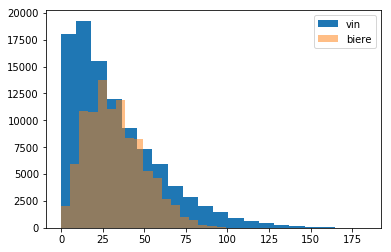

In [21]:
z=np.loadtxt("data/biereVin.csv",delimiter=",")
biere,vin=z[:,0],z[:,1]

print("début de la dataframe transposée\n",z[:20,:].T)
print("nombre total de donnée:",len(biere))
print("moyenne biere",np.mean(biere))
print("moyenne vin",np.mean(vin))
print("matrice de corrélation:\n",np.corrcoef(z.T))

fig,ax=plt.subplots()
ax.hist(vin,20,label="vin")
ax.hist(biere,20,label="biere",alpha=0.5)
ax.legend();

Nous voulons savoir si les français consomment autant de biere que de vin. Vous allez pour cela jouer au jeu des 5%. Vous ne disposez pas d'un générateur de données, mais il y a beaucoup de données. Vous allez donc découper l'échantillon en paquets (ex :  400 paquets de 250 individus)  et pour chaque paquet,  vous allez tester H0 = "les français boivent autant de biere que de vin".  A vous, le début de code est fournis. 


ATTENTION: il y a un piege! Les deux samples ne sont pas indépendants! (cela se voit où?).  Il ne faut dont pas utiliser le teste de Student de comparaison. Mais alors, que faire? 

In [ ]:
def deuxBoissons(sample1,sample2):

    nbData = 250#250
    nbEssaies = 400
    
    sample1 = sample1.reshape([nbEssaies, nbData])
    sample2 = sample2.reshape([nbEssaies, nbData])

    for i in range(nbEssaies):
        """"""
        #todo: faire un test par essaie


Conclusion : les français boivent-ils autant de vin que de bière? Recommencez avec le jeu de données vinCoca.csv
    
Et que se passe-t-il si on ne fait pas des paquets: que l'on fait un test avec toutes les données? 
Y-a-t-il un effet "vraie-vie et grosse-donnée"?

Remarque: biereVin et vinCoca sont de gros échantillons, ce qui nous permet de faire des paquets disjoints.
Quand on a moins de données, on peut tirer des paquets aléatoirement dans le jeu de donnée,
même si cela implique des recouvrements entre paquets (c'est la technique du 'bootstrap'). Et quand on a très peu de données, on ne joue pas au jeu des 5%: on ne fait qu'une seul test et on croise les doigts pour ne pas être sous H0 et dans les 5%. 

## Test de Kolmogorov-Smirnov

C'est un test très performant pour savoir si un échantillon
suit une loi donnée (par ex, une loi gaussienne).

### Fonction de répartition empirique

Lorsqu'on a un échantillon $X$ de taille $n$, la loi empirique c'est :
$$
    \frac 1  n  \sum_i  \delta_{X_i}
$$  
Ainsi on met des petites masses de dirac partout où tombe les observations.  La fonction de répartition "empirique" c'est la fonction de répartition de la loi empirique, c'est donc une fonction en escalier qui monte de $1/n$ à chaque $X_i$.

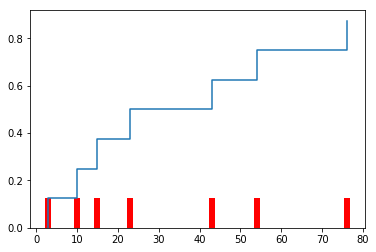

In [38]:
X=[10,43,76,15,76,3,23,54]
n=len(X)
fig,ax=plt.subplots()
ax.bar(sample,np.ones_like(X)/len(X),width=1.5,color="r")
X_sort=np.sort(X)
ax.plot(X_sort,np.arange(n)/n,drawstyle='steps-pre');

***A vous:***  Simulez un échantillon de loi exponentielle de taille 100. Superposer la fonction de répartition empirique avec la vrai fonction de répartition de la loi exponentielles ($ 3 \heartsuit $).

### Théorème de Glivenko-Cantelli

Soit $X$ un échantillon de taille $n$ et $F_X$ sa fonction de répartition empirique. 
Soit $F$ la fonction de répartition de la loi de $X_0$. Le théorème de Glivenko-Cantelli nous indique que quand $n$ tend vers l'infini, $F_X$ tend vers $F$ uniformément (= pour la distance $L_\infty$). 


***A vous:*** Illustrez ce résultat en superposant plusieurs graphiques ($3\heartsuit$).


La distance $L_\infty$ entre $F_X$ et $F$ est 
$$
\text{dist}(F_X,F)= \sup_x |F(x) - F_X(x)|
$$
***A vous:*** Ce supremum ne peut-être atteint qu'en des endroit bien précis. Lesquels? En d'autre terme: ou est-ce que $F$ et F_X sont les plus éloignées. Aide: faites un dessin. ($ 2 \heartsuit $ + $ 4 \diamondsuit $).  Vous en déduirez que la fonction suivante calcule effectivement cette distance.

In [ ]:
def distance(X,F):
    """remarque : le second argument de cette fonction est une fonction (un callable). """
    N=len(X)
    X_sort=np.sort(X)
    montee1=np.linspace(0,(N-1)/N,N)
    montee2=np.linspace(1/N,1,N)

    dist1=np.max(np.abs(F(X_sort) - montee1))
    dist2=np.max(np.abs(F(X_sort) - montee2))

    return max(dist1,dist2)


### Théorème de Kolmogorov-Smirnov

Le théorème de Glivenko-Cantelli est une sorte de L.F.G.N pour les fonctions de répartition empirique. Il existe aussi un espèce de T.C.L, c'est le théorème de Kolmogorov-Smirnov:

***Théorème:*** Soit $X$ un échantillon de taille $n$, $F_X$ sa fonction de répartition empirique, et soit $F$ la fonction de répartition de la loi de $X_0$. Quand $n$ est grand,  $\sqrt{n}\, \text{dist}(F_X,F)$  suit une loi de Kolmogorov-Smirnov. 


La loi de Kolmogorov-Smirnov, c'est la loi dont la fonction de répartition est donnée par
$$
F_{KS} (u) = 1 + 2 * \sum_{k>0}  (-1)^k \exp( -2 k^2 u^2 )
$$
Voici un petit programme qui calcule $F_{KS}$. En utilisant ce que vous savez sur les séries, expliquez pourquoi le critère d'arrêt que l'on a mis permet effectivement d'atteindre la précision voulue ($3\heartsuit$). 

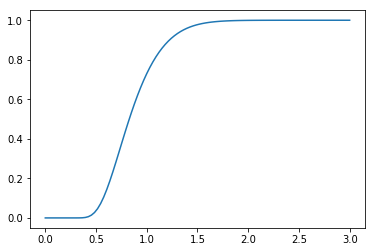

In [40]:
def F_KS(u, precision=1e-15):
    if u<=0: return 0

    sac=0
    elem=1
    k=1
    while elem>precision:
        elem=np.exp(-2*k**2*u**2)
        sac+=(-1)**k *elem
        k+=1

    return 1+2*sac


"""traçons cette fonction de répartition"""
xs=np.linspace(0,3,100)
ys=[]
for x in xs:
    ys.append(F_KS(x))
plt.plot(xs,ys);

***A vous:*** sauriez-vous ($3\heartsuit$) tracer la densité? 

### Le test

Le théorème de Kolmogorov-Smirnov nous permet de construire un test d'adéquation: Considérons un échantillon $X$ et une fonction de répartition $F$. 

* H0:  $X_0$ suit la loi dont la fonction de répartition est $F$
* H1:  ou pas 
 
Sous H0, $\sqrt{n}\text{dist}(F_X,F)$ suite une loi de KS. On  peut alors calculez une p-valeur, et choisir H0 ou H1 en fonction.
Sous H1, $F_X$ va converger vers la vraie fonction de répartition de $X_0$, et puisqu'elle est différente de $F$, $\sqrt{n}\,\text{dist}(F_X,F)$ va... ($1\heartsuit+1\diamondsuit$)

Voyons si vous avez compris: completez le programme ci-dessous ($3\heartsuit$)

In [ ]:
"""on générèe des données fictives"""
N=10000
data = np.random.normal(size=N)

""" calculez la p-valeur et la distance. Vous devez retrouvez les même résultats que la procédure toute faite.
"""

#TODO my_dist=...
#TODO py_p_value=...


dist,p_val=stats.kstest(data,"norm",alternative = 'two-sided')
print("avec le calcul tout fait")
print("p_val:",p_val)
print("D:",dist)

Application: Les deux échantillones suivants suivent-ils une loi Normale(0,1)? ($3\heartsuit$)

In [49]:
X1=np.array([0.23,0.05,-0.2,-0.23,-1.15,-0.34,-0.36,0.42,0.02,-0.25,-0.44,-0.54,-1.96,0.24,-0.35,-0.13,-0.53,-2.53,0.95,0.12,0.92,-1.13,-0.88,-1.66,0.87,2.69,0.71,0.83,-0.75,1.72,0.01,-0.38,1.77,-0.74,1.29,0.77,-0.74,-0.74,1.67,1.42,0.88,-1.9,2.74,0.58,-1.71,-0.44,-2.21,-0.83,-2.04,-0.95,-0.41,0.21,0.1,0.57,-0.95,-0.53,1.49,-1.62,0.83,0.52,0.52,-0.91,-1.22,2.17,0.28,0.21,0.44,-1.04,0.38,-0.69,0.07,-1.05,-0.13,-1.06,0.48,1.11,1.43,0.99,0.91,0.88,-0.7,1.02,-0.33,-0.99,0.22,0.79,-1.09,0.44,-0.66,1.04,-1.28,-0.98,0.75,-0.46,0.63,1.29,0.08,-0.62,-0.53,-1.11,-0.79,0.41,0.35,-0.02,1.41,0.45,0.9,-1.22,1.84,0.23,1.34,1.55,1.04,0.98,0.98,-1.01,-1.68,-1.79,-1.2,-0.5,0.37,1.2,-1.03,-0.3,0.77,1.44,1.36,-0.9,-0.63,-0.19,-0.21,-0.13,-2.65,-1.88,1.64,-0.35,-1.57,-2.75,-0.06,-1.,-0.78,0.22,1.51,1.43,0.54,-0.15,-0.17,1.03,-1.24,0.33,0.26,-0.12,-1.14,1.82,0.54,-0.39,-1.34,0.43,0.7,-0.64,2.07,1.12,0.4,-0.64,-0.51,1.24,1.3,1.65,-1.83,-0.33,-0.72,-1.67,-1.25,1.82,0.46,0.3,0.22,-1.58,1.21,0.64,0.4,0.54,0.29,0.34,0.74,-1.62,0.96,0.19,-0.12,-1.65,0.28,0.78,-0.11,-0.54,0.91,0.33,0.87,2.09,-0.58,-0.89,0.74,-0.33,-0.85,-1.13,0.94,0.94,-1.62,2.46,0.9,1.1,1.8,0.38,1.71,0.97,1.68,-0.7,0.3,0.23,1.74,-1.08,-0.7,0.74,0.73,-0.06,0.58,2.29,-1.57,-0.07,0.69,0.25,0.42,1.11,0.17,-0.86,-0.31,0.13,0.68,1.46,0.04,-0.01,-0.43,-0.05,0.28,2.17,1.35,-1.87,0.68,0.29,1.2,0.74,-1.21,-1.29,-0.42,0.57,1.38,-0.5,0.08,-0.74,1.61,0.34,-0.29,0.6,0.82,0.05,-0.75,0.17,-0.46,1.47,-0.13,-0.3,-0.1,0.07,-0.9,0.18,-2.21,-0.44,-0.91,-0.63,0.15,0.57,-0.39,0.87,-0.91,1.13,0.76,-1.22,-0.28,-0.92,-1.06,-0.6,-0.88,-0.51,-0.55,-0.44,-2.32,-2.77,3.86,1.1,-0.72,0.78,1.85,0.71,-0.38,-0.67,-0.66,-1.62,0.81,-0.92,0.72,-0.89,-0.66,0.03,-0.99,1.01,0.61,-0.46,-0.25,0.53,-0.3,-0.08,-0.81,0.84,0.17,0.4,-0.16,1.25,-1.4,1.81,-0.56,-1.26,-0.59,-0.55,0.23,-0.48,0.79,1.02,-0.3,1.16,0.61,-0.34,0.42,0.59,0.12,2.28,-0.14,1.45,0.51,-0.69,-0.77,-2.7,0.53,0.83,-0.55,-0.51,0.47,-0.06,0.72,1.79,0.2,0.87,1.07,-1.73,0.48,-0.19,2.4,0.77,0.4,0.01,-1.4,-0.02,0.49,1.32,0.46,0.7,-0.6,-0.22,0.27,1.34,0.39,1.68,-0.57,-0.38,-0.72,-1.48,1.83,-1.71,0.26,-0.9,0.11,1.14,-0.37,-0.47,0.01,0.17,2.36,-1.16,0.18,-0.42,-0.14,-0.26,-1.59,0.35,2.08,-0.83,-0.84,0.21,0.18,-0.04,-2.07,-0.04,1.14,0.19,-0.18,-0.41,2.25,1.16,-1.5,-0.71,1.01,1.37,1.06,-2.1,0.02,1.54,-0.15,-1.19,0.17,2.06,1.48,-0.87,0.48,1.52,-1.37,0.89,-0.41,1.24,-1.38,0.61,0.91,0.48,-0.07,-1.06,0.57,0.88,-0.86,0.65,0.06,-0.75,1.82,0.,-0.25,-1.52,-1.37,1.25,0.27,-0.05,1.09,0.42,0.69,-1.55,1.3,0.48,-3.71,-1.04,1.46,-0.31,-0.87,-0.77,-0.08,-0.58,2.05,-1.73,0.56,0.73,0.12,-0.56,-0.96,-0.81,-1.08,0.96,-1.04,0.83,0.59,0.19,0.85,-0.63,0.67,0.04,0.73,1.26,-0.98,-0.62,-1.2,0.1,0.85,-0.88,-1.89,1.06,-0.13,-0.34
])
X2=np.array([-2.98,-1.16,1.82,2.23,-3.67,-2.07,1.27,-1.24,-2.78,1.73,-6.29,-0.77,-1.87,0.82,-1.45,0.46,-2.94,0.26,1.88,4.82,2.02,1.49,4.58,-2.32,-0.48,-2.62,-2.87,0.14,1.91,-2.27,-0.47,3.82,-2.82,-0.14,1.82,-0.33,1.11,-0.95,0.54,0.95,-1.5,2.41,-1.28,-2.03,-1.09,-1.31,4.06,4.41,1.27,0.76,-0.21,0.8,1.19,1.55,-1.47,-1.1,0.32,0.78,-2.61,-1.88,-0.46,0.62,-3.15,4.49,-2.35,0.27,1.12,2.51,-0.43,2.06,3.47,-1.16,0.65,-2.21,2.84,0.39,-3.62,1.99,-1.31,0.24,-0.19,1.41,0.75,0.27,3.92,0.66,-1.52,2.83,1.48,-1.49,-1.43,-2.54,0.01,2.6,3.46,-3.,-1.6,2.07,-1.63,3.64,2.22,-0.18,0.44,-1.83,0.39,0.14,1.5,-1.39,1.1,-1.31,0.19,-1.49,-1.64,0.46,-1.15,0.78,1.1,-0.98,1.24,0.66,1.16,-0.94,-0.34,3.16,-0.85,0.13,-2.57,0.96,1.86,1.33,2.62,-1.2,-0.73,2.03,1.23,-2.4,0.37,-0.2,0.46,-3.15,-1.22,-0.42,1.59,-0.5,-1.,3.21,1.,1.31,-3.15,2.35,1.1,-0.69,-2.18,0.89,1.16,2.75,2.01,0.98,0.32,1.58,-3.66,1.14,3.8,0.35,-1.05,-2.85,-1.41,0.26,0.21,1.01,2.8,1.35,-0.62,3.42,-3.17,-2.77,0.27,-2.65,1.27,1.93,-0.96,-3.53,0.77,-3.65,-5.13,-1.85,-0.83,0.18,0.14,0.41,-1.06,2.07,0.64,0.09,2.09,2.1,0.72,1.47,4.98,-2.27,1.08,-2.12,0.97,0.21,2.24,-2.69,-0.25,0.45,2.14,2.98,1.82,-0.44,1.42,-2.14,3.37,-0.28,-2.29,-3.06,-0.13,1.84,1.86,1.18,-0.24,2.87,-2.64,-1.6,2.81,-3.18,-1.06,-0.55,1.95,0.12,-1.62,-0.58,-0.41,-3.35,-1.33,-0.98,4.72,-0.83,-1.06,1.01,1.39,1.65,-1.74,-3.12,-3.33,1.58,-2.15,0.16,1.,-0.66,1.73,3.62,-0.24,2.78,0.85,-5.05,-1.28,-2.51,-2.52,3.5,-1.17,1.,1.11,2.75,-2.82,-0.29,1.37,-0.92,4.68,0.1,-4.25,-0.65,-0.34,0.28,0.57,2.76,-3.06,0.73,3.33,1.02,-2.82,1.09,1.21,1.45,1.54,3.05,-0.89,-0.67,4.35,-2.28,0.43,1.27,0.96,-0.26,-1.09,-3.41,2.42,0.86,0.61,-0.71,2.04,2.74,-2.48,-1.75,-0.08,1.96,-0.08,4.39,-1.54,1.95,1.7,-1.98,2.1,-1.91,-1.69,-0.32,0.98,0.42,-1.83,-1.48,-2.01,-1.26,-0.51,-2.16,0.25,-0.71,-0.44,-3.39,1.19,-0.12,1.42,-0.01,-0.09,2.03,1.93,1.13,0.88,3.09,3.58,-1.64,-2.74,0.78,-0.77,-2.85,1.92,-2.31,0.51,-0.54,-0.6,-3.34,-1.68,1.49,6.09,-0.21,-0.64,-1.38,-1.32,0.88,1.84,1.86,-0.44,1.38,-2.19,2.6,-0.57,-1.7,-2.04,2.86,-0.16,-0.41,2.54,1.13,1.81,0.38,-2.93,0.94,2.73,-0.11,-0.24,-3.08,-0.39,1.74,1.9,-2.09,1.34,2.17,0.8,0.28,-0.83,3.85,-1.34,3.6,-0.74,-0.18,-0.38,-1.15,-2.99,0.97,-1.9,-0.18,1.16,0.31,0.35,-3.2,-0.93,-0.9,0.95,3.03,3.93,-1.27,0.93,-2.01,1.17,2.25,-2.6,5.57,-0.31,1.02,2.81,2.27,-0.,-2.02,0.89,-1.98,-0.11,-2.39,0.01,0.48,2.41,-1.1,-1.,-3.8,1.29,-1.93,-0.11,0.46,-1.1,0.43,-0.11,-1.73,1.32,3.35,0.17,-3.15,1.73,2.78,1.14,-4.08,2.18,1.61,-0.53,-0.7,0.87,2.21,0.98,-1.53,3.91,2.54,-2.54,1.36,-0.47,-0.47,-1.98,-1.24,-0.55,-0.57,-0.56,0.33,0.42,-2.29,-0.69,-0.85,0.8,2.71,4.32,0.08,-0.32,1.57,-2.09,-0.31,-0.92,2.61,0.78,1.52,-0.13,2.45,-0.14,2.6,2.73,-0.52,-1.44,-0.9,0.08,-0.48,1.79,1.54,-1.56,0.94
])


Pour la culture: `stats.ks_2samp(data1,data2)` permet de faire un test pour savoir si data1 et data2 ont même loi à partir de la distances entre les deux fonctions de répartition empiriques (cf. wikipedia pour le détail du test).

## Test de Mann-Whiteney

Nous présentons ici le test de mann-whiteney (aussi appelé Wilcoxon à deux échantillons)
qui pert de savoir si deux échantillons ont même loi. 
C'est un test non paramétrique : aucune hypothèse n'est faite sur les lois. 

En pratique c'est un test très utilisé car il est très 'robuste'. En particulier
il n'est pas sensible aux valeurs aberrantes (=outliers en anglais).
Ce sont les valeurs très grandes, très atypiques, provoquée par un individu atypique 
(ex : on a mis un rhinocéros dans la population d'éléphant)

***A vous:*** observez ce code. Les données sont de taille petite pour faciliter la lecture des sorties. Augementez la taille des donnée, puis effectuer le test dans le cas où les échantillons on même loi et dans le cas où ils n'ont pas même loi ($3\heartsuit$).

Tout
 [2.19 0.8  1.17 0.13 0.2  0.03 0.51 1.62 0.48 0.54 0.5  0.81 0.25 0.34 1.53 2.75 0.6  0.55 2.96 3.07]
indexSorted
 [ 5  3  4 12 13  8 10  6  9 17 16  1 11  2 14  7  0 15 18 19]
Tout[indexSorted]
 [0.03 0.13 0.2  0.25 0.34 0.48 0.5  0.51 0.54 0.55 0.6  0.8  0.81 1.17 1.53 1.62 2.19 2.75 2.96 3.07]
indexSorted
 [1 1 1 2 2 1 2 1 1 2 2 1 2 1 2 1 1 2 2 2]
rang
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
R1,R2 88 122
my_p_value 0.21229383619233166
p_value 0.21229383619233155


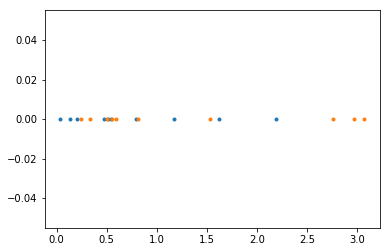

In [81]:
X1=np.random.exponential(1,size=10)
X2=np.random.exponential(1.2,size=10)

n1=len(X1)
n2=len(X2)

"""on colle bout à bout les échantillons"""
Tout=np.concatenate([X1,X2],axis=0)

plt.plot(X1,np.zeros_like(X1),".")
plt.plot(X2,np.zeros_like(X2),".")

""" on les classes """
indexSorted=np.argsort(Tout)
print("Tout\n",Tout)
print("indexSorted\n",indexSorted)
print("Tout[indexSorted]\n",Tout[indexSorted])

indexSorted[indexSorted<n1]=1
indexSorted[indexSorted>=n1]=2
print("indexSorted\n",indexSorted)

rang=np.arange(0,n1+n2)+1
print("rang\n",rang)

"""on calul la sommes des rangs (mais des rangs de quoi ?)"""
R1=np.sum(rang[indexSorted==1])
R2=np.sum(rang[indexSorted==2])

print("R1,R2",R1,R2)

""" on calcul des écart entre R1,R2 et une quantité qui correspond à leur espérance sous H0"""
U1=n1*n2+n1*(n1+1)/2-R1
U2=n1*n2+n2*(n2+1)/2-R2  #c'est aussi égal à  n1*n2-U1
U=min(U1,U2)


""" on renormalise """
Z=(2*U+1-n1*n2 )/np.sqrt(n1*n1*(n1+n2+1)/3)

""" La p-value se calcule à partir de la fonction de répartition gaussienne (tout est gaussien quand les données sont nombreuses).
Mais attention, si n1<20 ou n2<20, il faut lire les valeurs critiques dans des tables ad hoc"""
my_p_value=2*(1-stats.norm.cdf(np.abs(Z)))

"""maintenant avec la procédure toute faite"""
D,p_value=stats.mannwhitneyu(X1,X2,alternative='two-sided')

print("my_p_value",my_p_value)
print("p_value",p_value)



## Tests de Pearson du $\chi_2$

Les tests du $\chi_2$ sont une famille de test tous basé sur la même théorie. Commençons par un exemple, puis expliquons le principe général. 


### Test d'adéquation

C'est sans doute le test statistique le plus connu. Il est très simple à interpréter.  Il permet de savoir si un échantillon suit une loi donnée. Il ne s'applique qu'aux lois discrètes contraiement au test de Kolmogorov ou de Mann-Whitney. 

Exemple: On dispose de deux dès : un rouge et un noir. On voudrait savoir si l'un des deux est truqué. On les fait rouler 60 fois chacun.

In [55]:
"""nombre de 1,2,3,4,5,6 obtenu : """
black = np.array([9, 10, 12, 11, 8, 10])
red =  np.array([6, 5, 14, 15, 11, 9])
N=60

A l'oeil :  pensez-vous qu'un des deux dés et truqué? ($1\heartsuit$)


Tester qu'un dé n'est pas truqué revient à dire que sa loi est uniforme. Donc ($1\heartsuit$):

* H0: ...
* H1: ...
  

Pour choisir entre H0 et H1, nous effectuons le  test du $\chi_2$ de Pearson.
La fonction `scipy.stats.chisquare()` calcule une statistique positive :
Une sorte de distance entre les effectifs attendus (=expected) et les effectifs observés.
Puis elle calcule  une p-value.

Sans rien savoir de plus, vous pouvez conclure avec le programme suivant si l'un des deux dés est truqué ($1\heartsuit$).

In [59]:
D, p = stats.chisquare(f_obs=black,f_exp=[10, 10, 10, 10, 10, 10])

"""Remarque :  le second argument f_exp est facultatif, par défaut scipy.stats.chisquare teste une distribution uniforme"""
print("black dice")
print("stats:",D,"p-value:",p)
D, p = stats.chisquare(f_obs=red,f_exp=[10, 10, 10, 10, 10, 10])
print("red dice")
print("stats:",D,"p-value:",p)

black dice
stats: 1.0 p-value: 0.9625657732472964
red dice
stats: 8.399999999999999 p-value: 0.13552522337752962


ATTENTION :  dans la terminologie de scipy (découverte dans l'aide) :

* f_obs     =  frequency observed
* f_exp     =  frequency expected

Mais on comprend vite que "frequency" doit être un "nombre d'occurences"; alors qu'en français, les "fréquences"  seraient plutôt des fractions black/N et red/N.

Du coup, dans la suite, nous traduirons :
* f_obs     =  effectif observé
* f_exp     =  effectif expecté


Ne mélangez pas, car cela ne donne pas le bon résultat: essayez :

    D_bis, p_bis = scipy.stats.chisquare(f_obs=black/N,f_exp=[1/6,1/6,1/6,1/6,1/6,1/6])

***A vous:*** recalculez ($3\heartsuit$) avec python (sans `scipy.stats`) la statistique de Pearson (= distance du $\chi_2$). Elle est donnée par:
$$          
D =   \sum_{i} \frac{\big(f_{obs}(i)-f_{exp}(i,j)\big)^2}{f_{exp}(i)}                 
$$
avec 

* $f_{obs}(i)$: effectif observé dans la classe $i$
* $f_{exp}(i)$: effectif attendu dans la classe $i$

Sous H0, elle suit une loi du $\chi_2$ à $(J-1)$  degré de liberté ($J=6$=nombre de classe possible).
Calculez ($2\heartsuit$) la p-value en utilisant la fonction de répartition du $\chi_2$ fournie par scipy. 
Comparez avec les résultats de la fonction toute faite `scipy.stats.chisquare`.

### Principe général du $\chi_2$. 

Un test du $\chi_2$ teste  l'adéquation les fréquences $f_{obs}$ observée dans un échantillons et des fréquences attendues 
$f_{exp}$ (attendu=expected). La distance ou statistique du $\chi_2$ est la différences au carré entre $f_{obs}$ et $f_{exp}$ renormalisé comme ceci: 
$$          
D =   \sum_{i} \frac{\big(f_{obs}(i)-f_{exp}(i,j)\big)^2}{f_{exp}(i)}                 
$$

* Sous H0, $D$ suit une loi du $\chi_2$ à $J-1$ degré de liberté, où $J$ est le nombre de classe de valeur possible pour notre échantillon.  

* Sous H1, la distance $D$ est très grande (elle tend vers $+\infty$ quand la taille de l'échantillon grandi). 

MAIS:  Si la loi de probabilité attendue dépend de paramètres (moyenne, variance...) inconnus au moment du test, les données peuvent être utilisées pour estimer ceux-ci, ce qui facilite l'adéquation et donc change la loi de $D$: S'il y a $s$ paramètres inconnus,  $D$ suivra une loi du $\chi_2$ à  $J–s–1$ degrés de liberté.


***Application:***  On observe l'échantillon suivant (exemple de wikipedia):
$$
\begin{array}{l|c|c|c|c|c|}
\text{valeur} & 0&1&2&3&4 \\
\hline
\text{effectifs} & 31&45&16&7&1 \\
\hline
\end{array}
$$
    
Testez (4$\heartsuit$) si cet échantillon suit un loi de Poisson. Aide:

* Estimer le paramètre $\lambda$ de cette loi. Rappelons que $\lambda$ est l'espérance et la variance de la loi de Poisson, ce qui donne 2 estimateurs possibles. En général on prend le plus simple, mais tester les deux pour voir. 

* Trouver les J-classes, en utilisant la règle de Cochran (>=5 échantillons par classe). En principe, cette règle concerne les effectifs expected (=les proba théorique * le nombre d'observation). Mais pour créer les regroupements, on peut aussi regarder les effectifs observé, c'est plus simple.
Typiquement, sur le jeu de donnée ci-dessus, on a envie de regrouper $\{3\}$ et $[4,\infty[$ pour former la classe $[3,\infty[$. 


### Test d'indépendance

C'est un cas particulier du cadre général, on le montrera plus loin. Une fois n'est pas coutume, commençons par un exemple. 


Les données ont la forme d'une "dataframe"= une matrice où chaque colonne représente une caractéristique  et chaque
ligne représente une observation. Ici chaque ligne représente un homme,  qui a deux caractéristiques:

*  son pays d'origine qui peut être $[0,1,2,3,4]$ ce qui représente les pays \["France","Allemagne","Espagne","Italie","Angleterre"\].
*  sa boisson préférée qui peut être $[0,1,2]$ ce qui représente les boisons \["coca","vin","biere"\]


Dans la fonction "dataCreation" nous simulons les données. Dans un premier temps, ne  regarder pas en détail cette fonction, pour garder le suspense du test.

In [60]:
def dataCreation():
    np.random.seed(10)

    """
    Le pays et la boisson sont codés par des entiers.
       pays :            [0,1,2,3,4] -------> ["France","Allemagne","Espagne","Italie","Angleterre"]
       boisson préférée: [0,1,2] -----------> ["coca","vin","biere"]
    """

    """ on génère les pays  """
    country = np.random.choice( a=[0,1,2,3,4] ,
                                p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                                size=1000)
    """on génère les boissons"""
    favorite_beverage = np.random.choice(a= [0,1,2],
                                  p = [0.4, 0.2, 0.4],
                                  size=1000)

    """on colle (si on avait pas envie de coller, on aurait aussi pu renvoyer deux vecteurs)"""
    dataFrame=np.stack([country,favorite_beverage],axis=1)#axis=1 --> les 2 vecteurs deviendront des colonnes
    """ Nous avons clairement simulées des données "pays" et "boisson" indépendantes.
        Sauriez-vous comment les corréler ? :
        il y a pleins de façon de le faire, essayez-en une
        et refaites tourner le test d'indépendance.
    """
    return dataFrame

In [64]:
""" observons les données"""
dataFrame=dataCreation()
print(dataFrame[:40,:].T)

[[4 0 4 4 3 2 1 4 1 1 4 4 0 4 4 4 4 2 4 4 4 1 2 4 2 2 4 4 4 4 4 4 4 2 1 2 1 4 0 4]
 [0 2 1 2 0 0 2 0 1 0 2 1 1 2 0 2 0 2 2 1 0 1 0 0 2 0 1 1 0 0 0 0 0 2 2 0 2 2 0 1]]


In [65]:
""" Une fonction utilitaire qui calcule la matrice des effectifs (=frequencies) :
Je me suis amusé à remplir la documentation (=docstrings) de cette fonction.
"""
def computeFrequencies(X,Y,nbClassesX,nbClassesY):
    """
    :param X: première caractéristique des individus
    :param Y: seconde caractéristique des individus
    :param nbClassesX: le nombre de classe dans X
    :param nbClassesY: le nombre de classe dans Y
    :return: f_obs[x,y] est le nombre d'individu tel que X=x et Y=y
    """
    """je me suis amusé à faire un test"""
    assert len(X)==len(Y),"les deux vecteurs d'entrées doivent avoir la même longueur"

    f_obs = np.zeros([nbClassesX, nbClassesY])
    n = len(X)
    """on fait une conversion, au cas où l'utilisateur de cette fonction aurait rentré des float"""
    X=X.astype(np.int32)
    Y=Y.astype(np.int32)
    for i in range(n):
        f_obs[X[i], Y[i]] += 1

    """attention, seul les int peuvent servir d'indices. Sinon on a un message du genre :
                f_obs[X[i], Y[i]] += 1
                IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
        """


    return f_obs

In [66]:
""" testons 'computeFrequencies' """
dataFrame=dataCreation()
print(computeFrequencies(dataFrame[:,0],dataFrame[:,1],5,3))

[[ 21.   7.  32.]
 [ 65.  25.  64.]
 [107.  50.  94.]
 [ 15.   8.  15.]
 [189.  96. 212.]]


Effectuons maintenant le test d'indépendance

* H0: le pays d'origine et la boisson préférés sont indépendants
* H1: ils ne sont pas indépendants

In [67]:
dataFrame=dataCreation()
n = len(dataFrame)
observed=computeFrequencies(dataFrame[:,0],dataFrame[:,1],5,3)


total_country=np.sum(observed,axis=1)
total_fav_bev=np.sum(observed,axis=0)

""" le produit extérieur de deux vecteurs v,w est défini par :
         outer[i,j]=v[i]w[j]
    vous pouvez le faire à la main avec une double boucle.
"""
expected=np.outer(total_country,total_fav_bev)/n
"""pour sommer sur i et sur j, on applique deux fois la méthode .sum(). On peut aussi appliquer deux fois np.sum(...)"""
chi_squared_stat =   (((observed - expected) ** 2) / expected).sum().sum()


critical_value = stats.chi2.ppf(q=0.95,df=8)
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,df=8)


print("total_country\n",total_country)
print("total_fav_bev\n",total_fav_bev)
print("expected\n",expected)
print("chi_squared_stat:",chi_squared_stat)
print("critical_value:",critical_value)
print("p_value:",p_value)


print("la p-value est très grande, on choisi H0 sans hésitation --> indépendance")

print("\n\n Avec scipy")
print(stats.chi2_contingency(observed=observed))

total_country
 [ 60. 154. 251.  38. 497.]
total_fav_bev
 [397. 186. 417.]
expected
 [[ 23.82  11.16  25.02]
 [ 61.14  28.64  64.22]
 [ 99.65  46.69 104.67]
 [ 15.09   7.07  15.85]
 [197.31  92.44 207.25]]
chi_squared_stat: 7.169321280162059
critical_value: 15.50731305586545
p_value: 0.518479392948842
la p-value est très grande, on choisi H0 sans hésitation --> indépendance



avec scipy
(7.169321280162059, 0.518479392948842, 8, array([[ 23.82,  11.16,  25.02],
       [ 61.14,  28.64,  64.22],
       [ 99.65,  46.69, 104.67],
       [ 15.09,   7.07,  15.85],
       [197.31,  92.44, 207.25]]))


Expliquons le principe du test d'indépendance. Nous notons $f_{obs}(i,j)$ les effectifs observés dans la classe $(i,j)$.

Hypothèse H0 :   le couple (X,Y)  suit une loi définie par
$$
             \mathbf P[ (X,Y)=(i,j)] =  p(i)q(j)  \qquad  =  \frac{f_{exp}(i,j)}N 
$$
Mais les paramètres $p$ et $q$ sont à estimer. La manière naturelle de les estimer est :
$$
\begin{align}
        p(i) &=  \sum_j \frac{f_{obs}(i,j)} N\\
        q(j) &=  \sum_i \frac{f_{obs}(i,j)} N
\end{align}
$$
Ensuite on calcule la distance du $\chi_2$ comme précédemment:
$$          
D =   \sum_{i,j} \frac{\big(f_{obs}(i,j)-f_{exp}(i,j)\big)^2}{f_{exp}(i,j)}                 
$$
Cette statistique $D$ suit une loi du $\chi_2$, mais quel en est le degré de liberté `df`? Le nombre de classe totale est de $I\times J$. Si l'on n'avait pas estimé de paramètre, c.à.d si $p,q$ étaient connues, on aurait
$$
    df=I \times J-1
$$
Mais en vérité nous avons estimé:

* $I-1$ paramètres pour p ("-1" car le dernier est forcé pour que la somme fasse 1)
* $J-1$ paramètres pour q ("-1" car le dernier est forcé pour que la somme fasse 1)

Donc
$$
    df =(I\times J-1)-(I-1)-(J-1) = I\times J-I-J+1 = (I-1)(J-1)
$$

### d'autres tests du $\chi_2$

Maintenant, c'est à vous d'inventer la théorie! Essayez de trouver la distance du $\chi_2$ et le degré de liberté correspondant dans les cas suivant. 

* On considère deux échantillons $(X_i)$ et $(Y_i)$. On suppose pour simplifier qu'ils ont le même support discret {1,2,...,J}. Construisez ($4\diamondsuit$) un test pour tester H0: loi$(X)$ = loi$(Y)$
   
* On considère un échantillon constitué de paires $(X_i,Y_i)$.
     Construisez ($5\diamondsuit$) un test pour tester la symétrie de la loi jointe c.à.d  H0:  loi$(X,Y)$ = loi$(Y,X)$. 



### Exemple complet corrigé

Le sexe influe-t-il le vote? A vous de voir. Il y a un prétraitement des données à faire. Le début du code est fournis, 
et même le code complet si vous n'y arrivez pas. Méthodologie gagnante: lire un peu, et refaire soi-même.

In [70]:
data1 = "'femme' 'homme' 'femme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'femme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme' 'femme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'femme' 'femme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'femme' 'femme' 'homme' 'homme' 'femme' 'femme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme'"
data2 = "'droite' 'gauche' 'gauche' 'gauche' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'droite' 'droite' 'droite' 'gauche' 'gauche' 'gauche' 'droite' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'droite' 'gauche' 'gauche' 'gauche' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'droite' 'droite' 'droite' 'droite' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'droite' 'gauche' 'droite' 'droite' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'droite' 'droite' 'droite' 'droite' 'droite' 'gauche' 'droite' 'gauche' 'gauche' 'gauche' 'droite' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'gauche' 'droite' 'gauche' 'gauche' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'droite' 'droite' 'droite' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'droite' 'droite'"
sexesStr = data1.split(" ")
votesStr = data2.split(" ")

In [71]:
"""Non, ne lisez pas tout de suite"""
def correction():
    data1 = "'femme' 'homme' 'femme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'femme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme' 'femme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'femme' 'femme' 'homme' 'femme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'femme' 'femme' 'homme' 'homme' 'femme' 'femme' 'homme' 'homme' 'homme' 'homme' 'femme' 'homme' 'homme' 'femme' 'femme' 'femme' 'homme'"
    data2 = "'droite' 'gauche' 'gauche' 'gauche' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'droite' 'droite' 'droite' 'gauche' 'gauche' 'gauche' 'droite' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'droite' 'gauche' 'gauche' 'gauche' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'droite' 'droite' 'droite' 'droite' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'droite' 'gauche' 'droite' 'droite' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'gauche' 'droite' 'droite' 'droite' 'droite' 'droite' 'droite' 'gauche' 'droite' 'gauche' 'gauche' 'gauche' 'droite' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'gauche' 'droite' 'gauche' 'gauche' 'gauche' 'gauche' 'droite' 'droite' 'droite' 'droite' 'droite' 'droite' 'gauche' 'droite' 'droite' 'droite' 'gauche' 'droite' 'droite'"
    sexesStr=data1.split(" ")
    votesStr=data2.split(" ")
    n=len(sexesStr)

    """une petite vérification. Renverra une erreur si cela ne marche pas"""
    assert n==len(sexesStr),"les données sont bizarres"

    """ voyons ce que cela donne """
    print(sexesStr)

    sexes=np.zeros(n)
    votes=np.zeros(n)

    for i in range(n):
        """attention: comme les mots sont donnés avec des guillement simple, il faut les mettre """
        if sexesStr[i]=="'femme'":
            sexes[i]=1
        if votesStr[i]=="'droite'":
            votes[i]=1
    "vérifions"
    print(sexes)
    print(votes)

    observed=computeFrequencies(sexes,votes,2,2)
    print(observed)

### Vraies données


Voici  de vraies données sous forme d'une chaine de caractères. Elles ont été prise [ici.](https://www3.nd.edu/~busiforc/handouts/Data%20and%20Stories/correlation/Brain%20Size/brainsize.html)

Travail à effectuer :

*  retraitez ce jeu de données
*  testez si l'intelligence et le sexe sont indépendants. 

Vous pouvez aussi imaginez de vérifier d'autres indépendances (ex: taille<->sexe). 



Voici la signification des variables:

* IQ  = intelligence quotien = QI en français
* MRI = Magnetic Resonance Imaging  = IRM en français

* 1.Gender: Male or Female
* 2.FSIQ: Full Scale IQ scores
* 3.VIQ: Verbal IQ scores
* 4.PIQ: Performance IQ scores
* 5.Weight: body weight in pounds (hauteur du corps)
* 6.Height: height in inches (taille du corps)
* 7.MRI_Count: total pixel Count from the 18 MRI scans
* MRI_Count : représente la "taille" du cerveau évaluée par un décompte des  pixels sur l'IRM


Vous voulez en savoir plus sur VIQ et PIG [(référence).](http://provereal.blogspot.fr/2008/10/on-fsiq-viq-piq-general-discussion.html)

* Your VIQ score is indicative of your ability to work with abstract symbols,
your verbal memory skills and fluency abilities,
as well as the amount of education you have had, and whether you actually benefited from that education.

* Your PIQ score indicates your ability to work with concrete situations,
to work quickly, to integrate perceptual stimuli with motor responses,
as well as your visual spatial ability.


In [72]:
data="""
Gender FSIQ VIQ PIQ Weight Height MRI_Count
Female 133 132 124 118 64.5 816932
Male 140 150 124 ¥ 72.5 1001121
Male 139 123 150 143 73.3 1038437
Male 133 129 128 172 68.8 965353
Female 137 132 134 147 65.0 951545
Female 99 90 110 146 69.0 928799
Female 138 136 131 138 64.5 991305
Female 92 90 98 175 66.0 854258
Male 89 93 84 134 66.3 904858
Male 133 114 147 172 68.8 955466
Female 132 129 124 118 64.5 833868
Male 141 150 128 151 70.0 1079549
Male 135 129 124 155 69.0 924059
Female 140 120 147 155 70.5 856472
Female 96 100 90 146 66.0 878897
Female 83 71 96 135 68.0 865363
Female 132 132 120 127 68.5 852244
Male 100 96 102 178 73.5 945088
Female 101 112 84 136 66.3 808020
Male 80 77 86 180 70.0 889083
Male 83 83 86 ¥ ¥ 892420
Male 97 107 84 186 76.5 905940
Female 135 129 134 122 62.0 790619
Male 139 145 128 132 68.0 955003
Female 91 86 102 114 63.0 831772
Male 141 145 131 171 72.0 935494
Female 85 90 84 140 68.0 798612
Male 103 96 110 187 77.0 1062462
Female 77 83 72 106 63.0 793549
Female 130 126 124 159 66.5 866662
Female 133 126 132 127 62.5 857782
Male 144 145 137 191 67.0 949589
Male 103 96 110 192 75.5 997925
Male 90 96 86 181 69.0 879987
Female 83 90 81 143 66.5 834344
Female 133 129 128 153 66.5 948066
Male 140 150 124 144 70.5 949395
Female 88 86 94 139 64.5 893983
Male 81 90 74 148 74.0 930016
Male 89 91 89 179 75.5 935863
""";

In [77]:
""" '\n' c'est le symbole pour le retour à la ligne """
dataList=data.split("\n")

"""on ignore les deux premières lignes et la dernière"""
for i in range(2,len(dataList)-1):
    words=dataList[i].split(" ")
    #todo: mettre chaque word de words dans une matrice, en les convertissant comme il faut
    

['Female', '133', '132', '124', '118', '64.5', '816932']
['Male', '140', '150', '124', '¥', '72.5', '1001121']
['Male', '139', '123', '150', '143', '73.3', '1038437']
['Male', '133', '129', '128', '172', '68.8', '965353']
['Female', '137', '132', '134', '147', '65.0', '951545']
['Female', '99', '90', '110', '146', '69.0', '928799']
['Female', '138', '136', '131', '138', '64.5', '991305']
['Female', '92', '90', '98', '175', '66.0', '854258']
['Male', '89', '93', '84', '134', '66.3', '904858']
['Male', '133', '114', '147', '172', '68.8', '955466']
['Female', '132', '129', '124', '118', '64.5', '833868']
['Male', '141', '150', '128', '151', '70.0', '1079549']
['Male', '135', '129', '124', '155', '69.0', '924059']
['Female', '140', '120', '147', '155', '70.5', '856472']
['Female', '96', '100', '90', '146', '66.0', '878897']
['Female', '83', '71', '96', '135', '68.0', '865363']
['Female', '132', '132', '120', '127', '68.5', '852244']
['Male', '100', '96', '102', '178', '73.5', '945088']
['F